Pavitra Bhargavi Allamaraju, Rowan Cake, Phil Sukparangsee, and Eric Yee

In [21]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


# Problem Statement

Construct a linear regression model that predicts the duration of sleep given the time engaged in physical activity (in minutes), stress level experienced (between 1-10), and self-reported quality of sleep (between 1-10) for 374 people.

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | duration of sleep | dependent variable | $T$ | hours |
| $\beta_0$ | regression coefficient for sleep duration | parameter | $T$ | hours |
| $X_1$ | time engaged in physical activity during the day | independent variable | $T$ | minutes |
| $\beta_1$ | regression coefficient for physical activity | parameter | $T$ | hours/minutes |
| $X_2$ | self-reported stress level experienced (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_2$ | regression coefficient for stress level | parameter | $T$ | hours |
| $X_3$ | self-reported quality of sleep (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_3$ | regression coefficient for quality of sleep | parameter | $T$ | hours |
| $\epsilon$ | residual error | parameter | $T$ | hours |

# Assumptions and Constraints

- The subjective formulation of a score from 1 to 10 for stress experienced and quality of sleep is uniform across all participants.
- Participants are assumed to report their sleep times and subjective scores truthfully and without bias.
- Sleep duration is assumed to be influenced only by the variables included in the model, no additional variables affect it.
- The relationship between sleep duration and the predictors is assumed to be linear.
- The explanatory variables are assumed to be linearly independent.
- The model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$.
- The average value of the error is 0: i.e, $\mathbb{E}(\epsilon_i) = 0$ for all $i$.
- The variance of the error is constant: i.e, $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- The error $\epsilon$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- The error is independent for each $\epsilon_i$ for all $i$.

# Building the Solution

The linear regression model is defined as $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$

We first fit a baseline linear regression model using `statsmodels.api` to understand how well the raw data satisfies the 3 core assumptions of linear regression and to diagnose any other structural issues in the untransformed data. Below is our analysis of that model.

In [22]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)

In [23]:
X = sleep[['Physical_Activity','Quality','Stress']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print("R^2 Adj: " + reg.rsquared_adj.astype('str'))
print(reg.params)

R^2 Adj: 0.7833097936534077
const                3.673707
Physical_Activity    0.002414
Quality              0.498098
Stress              -0.060716
dtype: float64


**Observations from the Summary Table (Omitted for Space):**

The $R^2_{adj}$ is relatively high, indicating that most of the variance in the target variable (Sleep Duration) can be explained by the model features. The regression coefficient for Physical Activity is small because the variable is a weak predictor of sleep duration, or its scale is too large relative to other variables.  To further assess the model’s validity, we now examine its performance on the linear regression assumptions. 

# Analyze and Assess

## Analysis of the Residual-Covariate/Partial Regression Plots

Residual-covariate and partial regression plots evaluate whether the first assumption of linear regression, the average value of the error being 0 ($\mathbb{E}(\epsilon_i) = 0, ∀ i$), is satisfied.

**Residual Plots:** In the residuals versus Physical Activity plot, the data is not evenly distributed about the $y=0$ line. When we look at residuals versus Sleep Quality, some points are not distributed evenly about the $y=0$ line. However, this violation isn’t as extreme as in the Physical Activity plot. Finally, we look at residuals versus Stress, where this plot actually satisfies the condition of being evenly distributed over the horizontal axis. However, with two of the three variables violating the condition, we conclude that the residual plots are not randomly scattered.

**Partial Regression Plots:** The covariates that best exhibit a linear trend are Sleep Quality and the regression constant, even though the correlations are still fairly weak. However, the Physical Activity and Stress plots don't show a linear trend. Thus, with half of the plots not following a linear trend and the other half being ambiguous, the zero error mean condition is violated as well.

**Conclusion:** In both analyses above, the condition for the mean of the errors to be 0 is violated. Therefore, the linear regression model built from the untransformed data violates the first assumption of linear regression.

#### Analysis of the Residuals-Fitted Y's Plot:

We observe a cluster of data below the horizontal axis around fitted values of approximately 6.25 to 7.5 hours of sleep, with the residuals being narrowly centered around the middle. This non-random structure indicates that the variance is not constant, thus violating the second assumption of linear regression.

#### Analysis of the Normal-Residuals (QQ) Plot:

In the QQ plot, we observe that the residuals do not lie on the $y=x$ line but instead form a tilted parabola, indicating a right-skewed distribution. Hence, we conclude that the model violates the third assumption of linear regression.

#### Conclusion on Assumptions (Untransformed Data):

In summary, the untransformed data fail to meet the assumptions required for a valid linear regression model. As a result, we will transform the data to find a model that better satisfies the first three assumptions of linear regression. 

## Transforming Data and Model Fitting

**Explanation of Transformations:** To reduce the extent to which the original model violated certain linear regression assumptions, we transformed the input and output variables of the data using different mathematical functions. We sought a combination of functions that aligned the diagnostic plots with what we expect for linear regression while also maintaining or improving the overall $R^2_{adj}$ value. Through trial and error, we concluded on the following transformations:

    - Taking the square of the Stress values; 
    - Taking the square of the Sleep Quality values;
    - Taking the square of the Physical Activity values;
    - Taking the natural log of the Sleep Duration values;

We considered another model that transformed the Sleep Quality values using the natural log, which greatly improved the QQ plot by aligning the points more along the idealized line. However, this model had a lower $R^2_{adj}$ than the untransformed model, less linear points in the partial regression plots for Sleep Quality and the regression constant ($\beta_0$), and less random scatter in the residual against fitted value plot. With these factors in consideration, we decided to use the square of Sleep Quality values in our final model.

In [31]:
sleepTransformed = sleep.copy()
sleepTransformed['Physical_Activity Squared'] = (sleepTransformed['Physical_Activity'])**2
sleepTransformed['Quality Squared'] = (sleepTransformed['Quality'])**2
sleepTransformed['Stress Squared'] = (sleepTransformed['Stress'])**2
sleepTransformed['Duration Log'] = np.log(sleepTransformed['Duration'])
X_transformed = sleepTransformed[['Physical_Activity Squared','Quality Squared','Stress Squared']]
Y_transformed = sleepTransformed['Duration Log']
X_transformed = sm.add_constant(X_transformed)
reg_transformed = sm.OLS(Y_transformed, X_transformed).fit()
print('R^2 Adj:', reg_transformed.rsquared_adj)

R^2 Adj: 0.8047269776324298


Each transformation increased the model's $R^2_{adj}$ coefficient. Our model’s $R^2_{adj}$ value of 0.805 indicates that the model fits the data closely. The final model’s residual-versus-covariate plot for all covariates appeared more randomly scattered.

Below are the partial regression plots on the untransformed data.

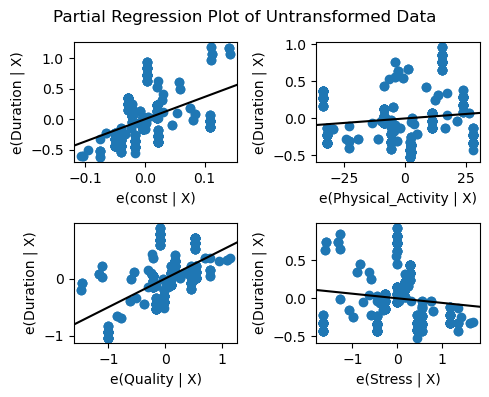

In [36]:
# Plot 1 (Partial Regression Plots on Untransformed Data)
fig = plt.figure(figsize=(5,4))
sm.graphics.plot_partregress_grid(reg,fig=fig)
plt.suptitle('Partial Regression Plot of Untransformed Data')
plt.subplots_adjust(top=0.9)
plt.show()

Below are the partial regression plots on the transformed data.

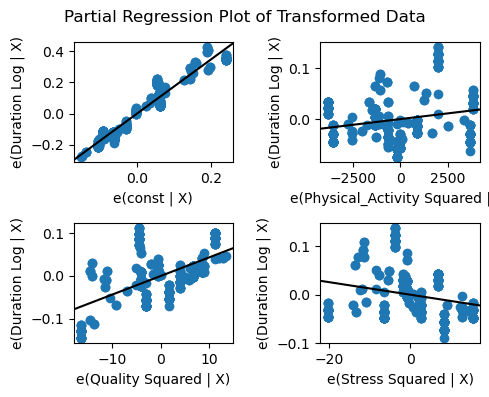

In [35]:
# Plot 2 (Partial Regression Plots on Transformed Data)
fig = plt.figure(figsize=(5,4))
sm.graphics.plot_partregress_grid(reg_transformed,fig=fig)
plt.suptitle('Partial Regression Plot of Transformed Data')
plt.subplots_adjust(top=0.9)
plt.show()

Although the partial regression plot for physical activity did not improve by much, the corresponding plots for stress and quality show stark improvement. 

In [27]:
fitted_y_original = reg.fittedvalues
residuals_original = reg.resid

fitted_y_transformed = reg_transformed.fittedvalues
residuals_transformed = reg_transformed.resid

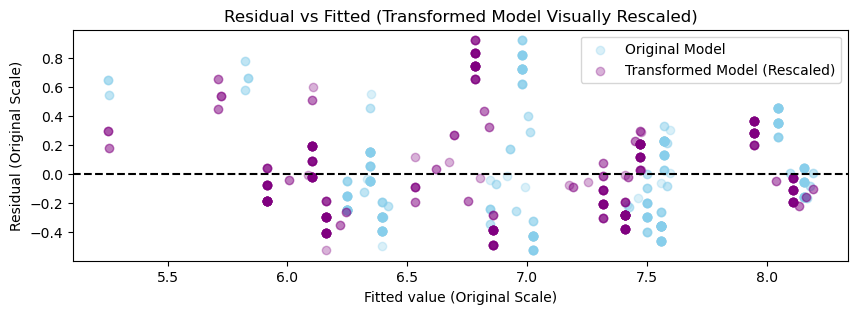

In [8]:
# Plot 3 (Overlaid Constant Variance Plot)
def rescale_to_range(values, new_min, new_max):
    old_min, old_max = values.min(), values.max()
    return (values - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

fitted_trans_scaled = rescale_to_range(fitted_y_transformed, fitted_y_original.min(), fitted_y_original.max())
residuals_trans_scaled = rescale_to_range(residuals_transformed, residuals_original.min(), residuals_original.max())

plt.figure(figsize=(10,3))
plt.scatter(fitted_y_original, residuals_original, color='skyblue', alpha=0.3, label='Original Model')
plt.scatter(fitted_trans_scaled, residuals_trans_scaled, color='purple', alpha=0.3, label='Transformed Model (Rescaled)')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Fitted value (Original Scale)")
plt.ylabel("Residual (Original Scale)")
plt.legend()
plt.title("Residual vs Fitted (Transformed Model Visually Rescaled)")
plt.show()

In the residual-versus-fitted values plot of the final model, the previously large positive residuals are closer to the $y=0$ line.

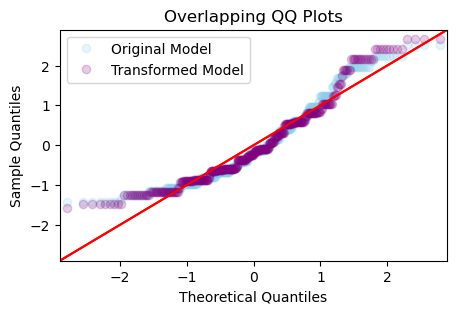

In [9]:
# Plot 4 (Overlapping QQ Plots)
residuals_original = reg.resid
fig, ax = plt.subplots(figsize=(5,3))
plt.title("Overlapping QQ Plots")
sm.qqplot(residuals_original, fit = True, line='45', markerfacecolor='skyblue', markeredgecolor='skyblue', alpha = 0.2, ax=ax, label='Original Model')
sm.qqplot(residuals_transformed, fit = True, line='45', markerfacecolor='purple', markeredgecolor='purple', alpha = 0.2, ax=ax, label='Transformed Model')
plt.legend()
plt.show()

Unfortunately, the QQ plot of the transformed data looks slightly worse than the untransformed data. The points at the top end of the transformed model deviate more, so they do not lie along the idealized line as much as points from the untransformed model. Therefore, the transformation lessened the violations on the assumptions that the errors have a mean of zero and a constant variance. However, the assumption that errors are normally distributed is slightly more violated.

### Real-World Interpretation of Covariates

In [10]:
print(reg_transformed.params)

const                1.742561
Physical_Activity    0.000004
Quality              0.004368
Stress              -0.001296
dtype: float64


Sleep Quality shows the strongest positive correlation with Sleep Duration as expected, since an adequate amount of sleep would likely be a major factor in determining Sleep Quality.

Stress shares a negative correlation with Sleep Duration, implying that high stress levels will shorten sleep as expected. Moreover, the magnitude of Stress is smaller than Quality, indicating that it affects Sleep Duration less than Sleep Quality. 

Finally, comparing the coefficient for Physical Activity ($\beta_1 = 4.473e^{-6}$) against the other covariates, it appears to contribute extremely little in predicting Sleep Duration. However, after accounting for the magnitude of Physical Activity data we see that it does contribute in a smaller but still significant way to predicting Sleep Duration, which is also what we would expect given the well known correlation between physical activity and health.

In conclusion, our transformed model lessens the severity of violations on the linear regression assumptions. The model produces reasonable predictions, and the coefficients align with our expectations of how each covariate affects the output.